In [1]:
import pandas as pd
import missingno as msn
import matplotlib.pyplot as plt
import seaborn as sb


In [2]:
path = 'data/compressive_strength.xlsx'
df_concrete = pd.read_excel(path, index_col=False)


<span style="font-family:Lucida Sans Unicode; color:#a10a0a; font-size: 30px; text-shadow: 1px 1px black; font-weight: bold"> 1 Construct proper data </span>


<span style="font-family:Lucida Sans Unicode; color:#a10a0a; font-size: 24px; text-shadow: 1px 1px black"> 1.1 Inquire structural integrity </span>


In [3]:
df_concrete.reset_index(drop=True, inplace=True)


In [4]:
df_concrete.head(25)


,compressive_strength,Cement,BlastFurnaceSlag,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age
0,79.99,540.0,0.0,162.0,2.5,1040.0,676.0,28
1,61.89,540.0,0.0,162.0,2.5,1055.0,676.0,28
2,40.27,332.5,142.5,228.0,0.0,932.0,594.0,270
3,41.05,332.5,142.5,228.0,0.0,932.0,594.0,365
4,44.30,198.6,132.4,192.0,0.0,978.4,825.5,360
5,47.03,266.0,114.0,228.0,0.0,932.0,670.0,90
6,43.70,380.0,95.0,228.0,0.0,932.0,594.0,365
7,36.45,380.0,95.0,228.0,0.0,932.0,594.0,28
8,45.85,266.0,114.0,228.0,0.0,932.0,670.0,28
9,39.29,475.0,0.0,228.0,0.0,932.0,594.0,28


In [5]:
df_concrete.describe()


,compressive_strength,Cement,BlastFurnaceSlag,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,35.817961,281.167864,73.895825,181.567282,6.204660,972.918932,773.580485,45.662136
std,16.705742,104.506364,86.279342,21.354219,5.973841,77.753954,80.175980,63.169912
min,2.330000,102.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000
25%,23.710000,192.375000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000
50%,34.445000,272.900000,22.000000,185.000000,6.400000,968.000000,779.500000,28.000000
75%,46.135000,350.000000,142.950000,192.000000,10.200000,1029.400000,824.000000,56.000000
max,82.600000,540.000000,359.400000,247.000000,32.200000,1145.000000,992.600000,365.000000


In [6]:
df_concrete.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   compressive_strength  1030 non-null   float64
 1   Cement                1030 non-null   float64
 2   BlastFurnaceSlag      1030 non-null   float64
 3   Water                 1030 non-null   float64
 4   Superplasticizer      1030 non-null   float64
 5   CoarseAggregate       1030 non-null   float64
 6   FineAggregate         1030 non-null   float64
 7   Age                   1030 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 64.5 KB


<span style="font-family:Lucida Sans Unicode; color:#a10a0a; font-size: 24px; text-shadow: 1px 1px black"> 1.2 Enhance data accessibility </span>


In [7]:
print("Columns before modification:")
df_concrete.columns


Columns before modification:


Index(['compressive_strength', 'Cement', 'BlastFurnaceSlag', 'Water',
       'Superplasticizer', 'CoarseAggregate', 'FineAggregate', 'Age'],
      dtype='object')

In [8]:
df_concrete.rename(columns={'Cement': 'cement', 'BlastFurnaceSlag': 'blast_furnace_slag', 'Water': 'water',
                                    'Superplasticizer': 'super_plasticisers', 'CoarseAggregate': 'coarse_aggregate',
                                    'FineAggregate': 'fine_aggregate', 'Age': 'age'}, inplace=True)


In [9]:
print("Columns after modification:")
df_concrete.columns


Columns after modification:


Index(['compressive_strength', 'cement', 'blast_furnace_slag', 'water',
       'super_plasticisers', 'coarse_aggregate', 'fine_aggregate', 'age'],
      dtype='object')

<span style="font-family:Lucida Sans Unicode; color:#a10a0a; font-size: 24px; text-shadow: 1px 1px black"> 1.3 Analyze any Missing values </span>

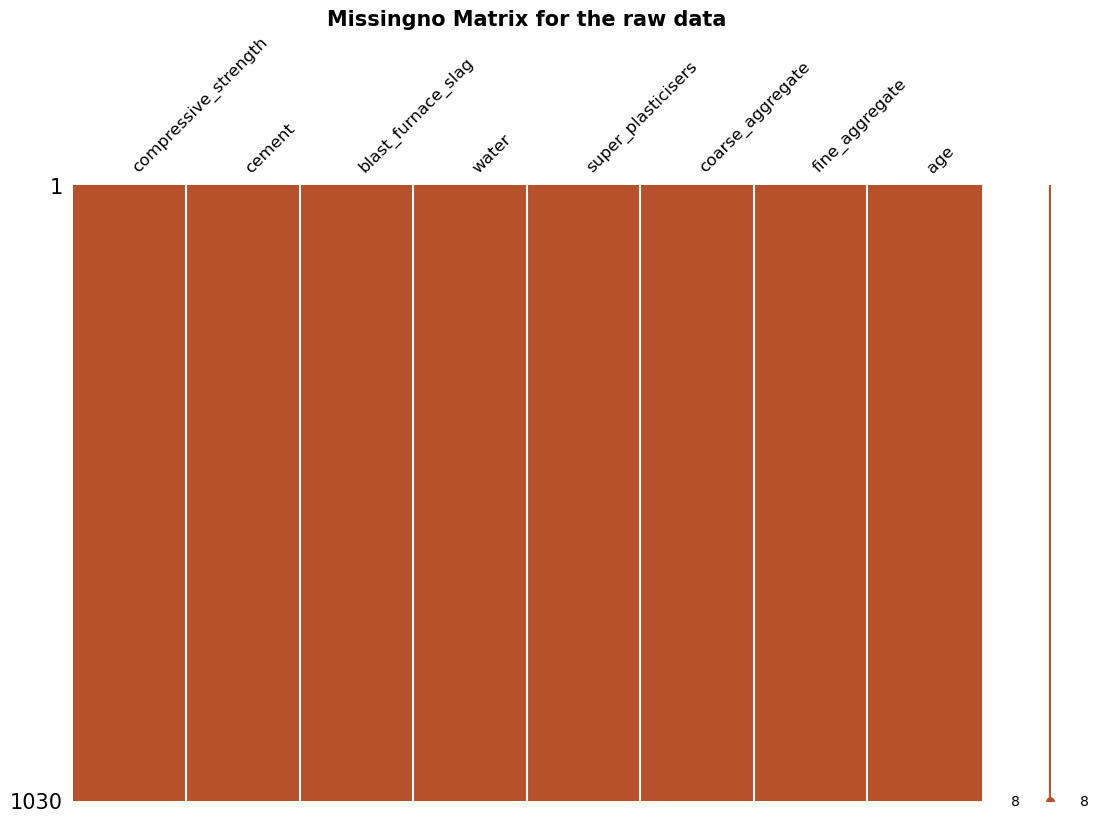

In [10]:
msn.matrix(df_concrete, color=(0.72, 0.32, 0.17), figsize=[13, 8], fontsize=12)
plt.title("Missingno Matrix for the raw data", fontsize=15, fontweight='bold')
plt.show()


In [11]:
df_concrete.isnull().sum()

compressive_strength    0
cement                  0
blast_furnace_slag      0
water                   0
super_plasticisers      0
coarse_aggregate        0
fine_aggregate          0
age                     0
dtype: int64

<span style="font-family:Lucida Sans Unicode; color:#a10a0a; font-size: 24px; text-shadow: 1px 1px black"> 1.4 Data cleaning </span>

In [12]:
df_concrete.dropna(axis='columns')


,compressive_strength,cement,blast_furnace_slag,water,super_plasticisers,coarse_aggregate,fine_aggregate,age
0,79.99,540.0,0.0,162.0,2.5,1040.0,676.0,28
1,61.89,540.0,0.0,162.0,2.5,1055.0,676.0,28
2,40.27,332.5,142.5,228.0,0.0,932.0,594.0,270
3,41.05,332.5,142.5,228.0,0.0,932.0,594.0,365
4,44.30,198.6,132.4,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,44.28,276.4,116.0,179.6,8.9,870.1,768.3,28
1026,31.18,322.2,0.0,196.0,10.4,817.9,813.4,28
1027,23.70,148.5,139.4,192.7,6.1,892.4,780.0,28
1028,32.77,159.1,186.7,175.6,11.3,989.6,788.9,28


<span style="font-family:Lucida Sans Unicode; color:#a10a0a; font-size: 24px; text-shadow: 1px 1px black"> 1.5 Find duplicates and perform the De-duplication process </span>

In [13]:
duplicated_cells = 0
check_duplicate = df_concrete.duplicated()


In [14]:
for row in check_duplicate:
    if row:
        duplicated_cells += 1

duplicated_prc = (duplicated_cells / len(check_duplicate)) * 100
print("• Total Cells:", len(check_duplicate), '\n'
     "• Duplicated Cells:", duplicated_cells,'\n'
     "• Duplicate %:", duplicated_prc)


• Total Cells: 1030 
• Duplicated Cells: 25 
• Duplicate %: 2.4271844660194173


In [15]:
df_concrete = df_concrete.drop_duplicates(subset=None, keep='first', inplace=False,
                                                    ignore_index=False)


<span style="font-family:Lucida Sans Unicode; color:#a10a0a; font-size: 24px; text-shadow: 1px 1px black"> 1.6 Validate de-duplication </span>

In [16]:
duplicated_cells = 0
check_duplicate = df_concrete.duplicated()

for row in check_duplicate:
    if row:
        duplicated_cells += 1

print("• Number of duplicated cells after de-duplication:", duplicated_cells)


• Number of duplicated cells after de-duplication: 0


<span style="font-family:Lucida Sans Unicode; color:#a10a0a; font-size: 24px; text-shadow: 1px 1px black"> 1.7 Combine similar features </span>

In [17]:
df_concrete['combined_aggregate'] = df_concrete['coarse_aggregate']\
                                         + df_concrete['fine_aggregate']

df_concrete['combined_aggregate'].head(15)


0     1716.0
1     1731.0
2     1526.0
3     1526.0
4     1803.9
5     1602.0
6     1526.0
7     1526.0
8     1602.0
9     1526.0
10    1803.9
11    1803.9
12    1526.0
13    1602.0
14    1602.0
Name: combined_aggregate, dtype: float64

<span style="font-family:Lucida Sans Unicode; color:#a10a0a; font-size: 30px; text-shadow: 1px 1px black; font-weight: bold"> 2 Feature Analysis </span>

<span style="font-family:Lucida Sans Unicode; color:#a10a0a; font-size: 24px; text-shadow: 1px 1px black"> 2.1 Compressive Strength Inspection </span>

In [18]:
df_concrete['compressive_strength'].describe()


count    1005.000000
mean       35.250378
std        16.284815
min         2.330000
25%        23.520000
50%        33.800000
75%        44.870000
max        82.600000
Name: compressive_strength, dtype: float64

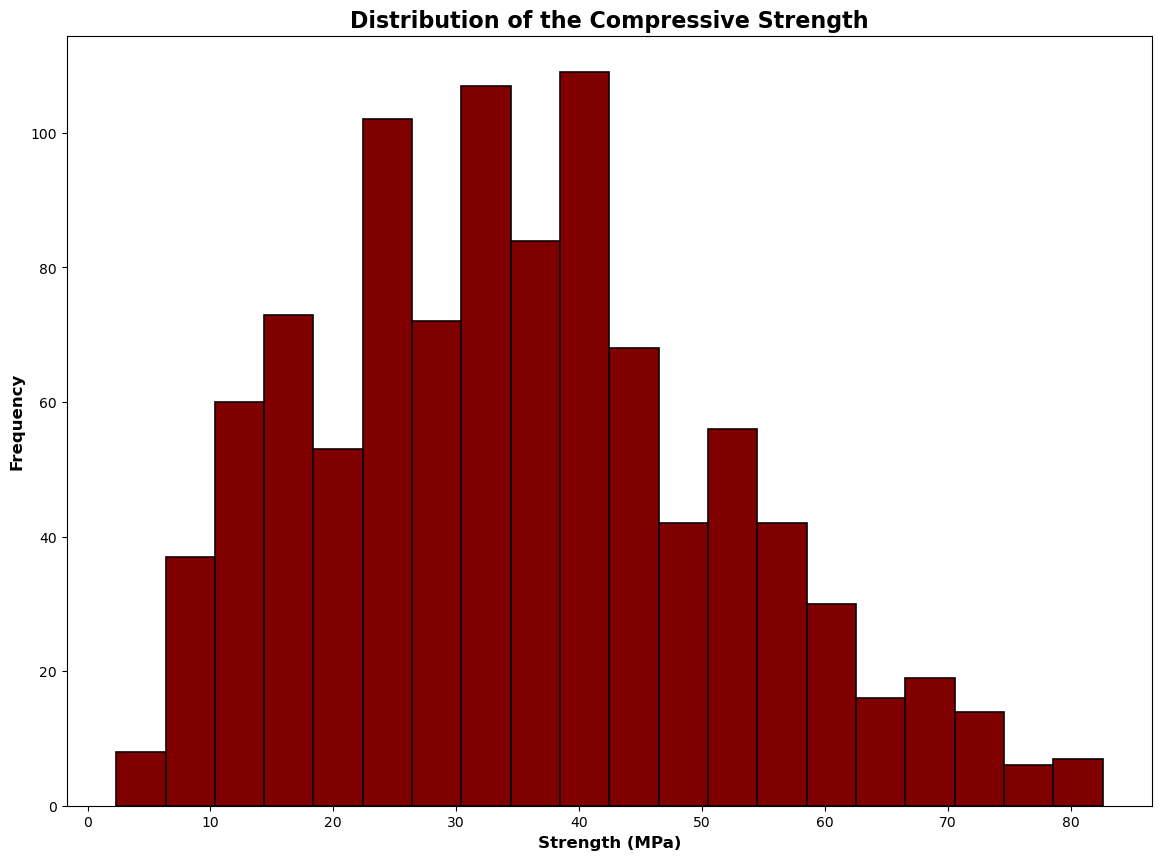

In [19]:
plt.figure(figsize=(14, 10))
plt.hist(df_concrete['compressive_strength'], bins=20, color='maroon', edgecolor='#0d0103', linewidth=1.2)
plt.title("Distribution of the Compressive Strength", fontsize=16, fontweight='bold')
plt.xlabel("Strength (MPa)", fontsize=12, fontweight='bold')
plt.ylabel("Frequency", fontsize=12, fontweight='bold')
plt.show()


<span style="font-family:Lucida Sans Unicode; color:#a10a0a; font-size: 24px; text-shadow: 1px 1px black"> 2.2 Feature Histograms </span>

In [20]:
bins = 15
d1 = df_concrete['cement']
d2 = df_concrete['blast_furnace_slag']
d3 = df_concrete['water']
d4 = df_concrete['super_plasticisers']
d5 = df_concrete['coarse_aggregate']
d6 = df_concrete['fine_aggregate']
d7 = df_concrete['age']


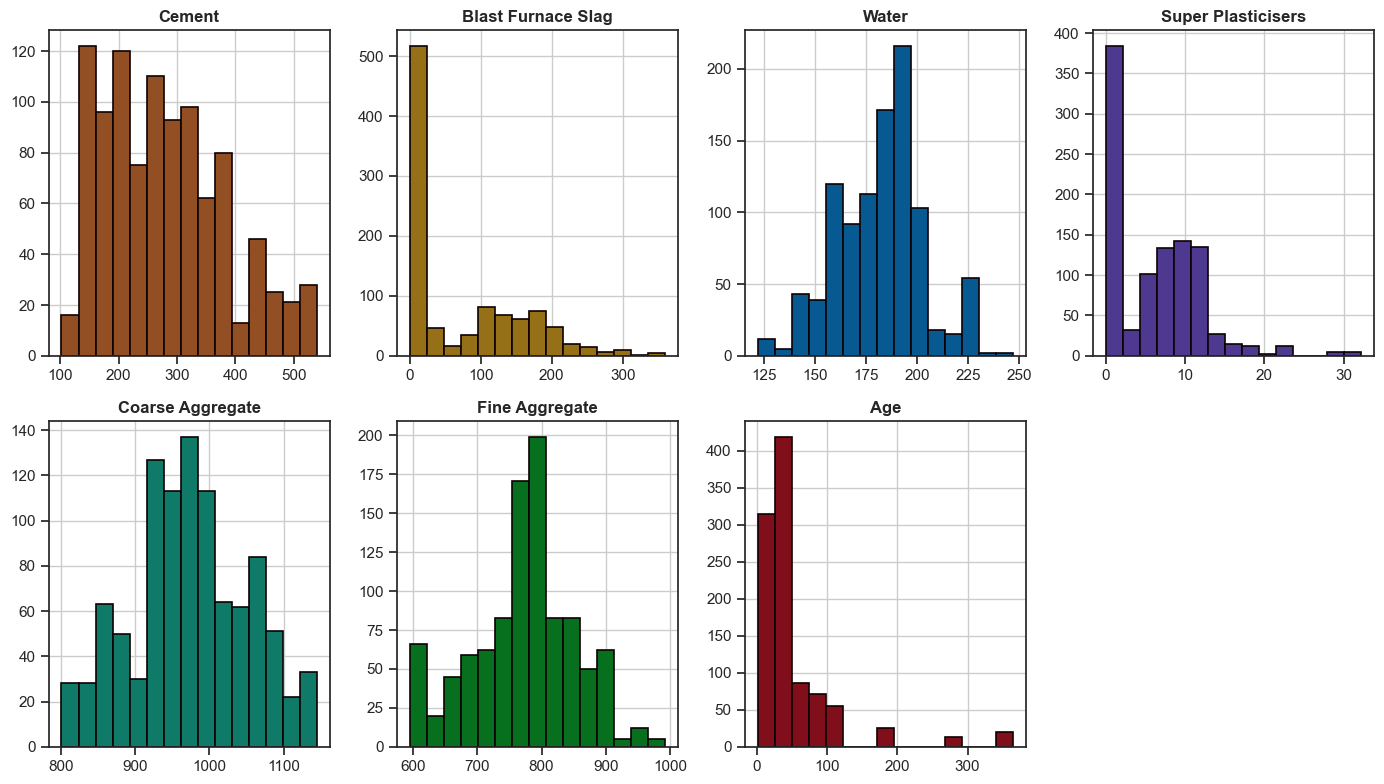

In [47]:
fig, axes = plt.subplots(2, 4)
plt.rcParams["figure.figsize"] = [14, 8]
plt.rcParams["figure.autolayout"] = True

d1.hist(bins=bins, color='#914f23', ax=axes[0, 0], edgecolor='#0d0103', linewidth=1.2)
d2.hist(bins=bins, color='#967017', ax=axes[0, 1], edgecolor='#0d0103', linewidth=1.2)
d3.hist(bins=bins, color='#065a91', ax=axes[0, 2], edgecolor='#0d0103', linewidth=1.2)
d4.hist(bins=bins, color='#4d398f', ax=axes[0, 3], edgecolor='#0d0103', linewidth=1.2)

d5.hist(bins=bins, color='#0f7a67', ax=axes[1, 0], edgecolor='#0d0103', linewidth=1.2)
d6.hist(bins=bins, color='#06701e', ax=axes[1, 1], edgecolor='#0d0103', linewidth=1.2)
d7.hist(bins=bins, color='#800e1b', ax=axes[1, 2], edgecolor='#0d0103', linewidth=1.2)
fig.delaxes(axes[1, 3])

axes[0, 0].set_title('Cement', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Blast Furnace Slag', fontsize=12, fontweight='bold')
axes[0, 2].set_title('Water', fontsize=12, fontweight='bold')
axes[0, 3].set_title('Super Plasticisers', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Coarse Aggregate', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Fine Aggregate', fontsize=12, fontweight='bold')
axes[1, 2].set_title('Age', fontsize=12, fontweight='bold')
plt.show()


<span style="font-family:Lucida Sans Unicode; color:#a10a0a; font-size: 24px; text-shadow: 1px 1px black"> 2.3 Pearson Correlation </span>

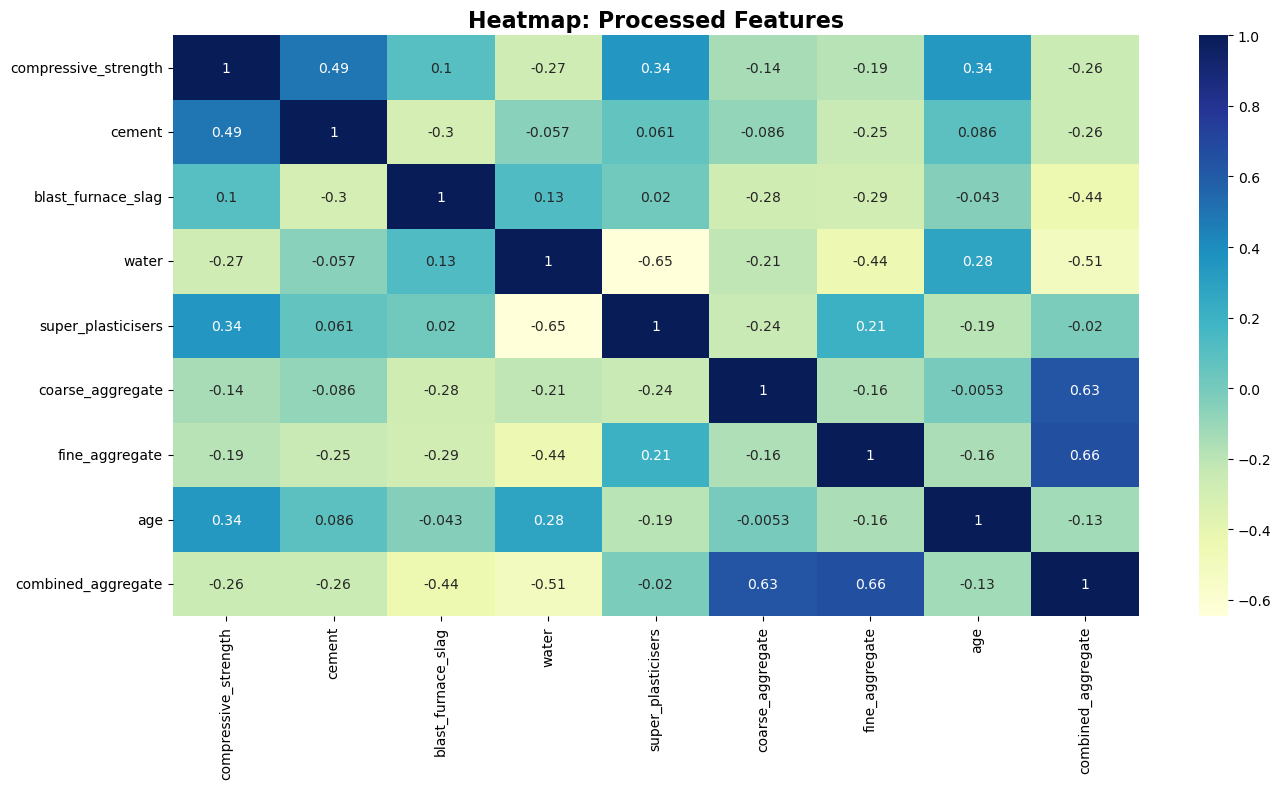

In [22]:
title = "Heatmap: Processed Features"
data_plot = sb.heatmap(df_concrete.corr(), cmap="YlGnBu", annot=True)

plt.title(title, fontsize=16, fontweight='bold')
plt.yticks(rotation='horizontal')
plt.show()


<span style="font-family:Lucida Sans Unicode; color:#a10a0a; font-size: 24px; text-shadow: 1px 1px black"> 2.4 Quantity of cement vs High Strength </span>

In [23]:
high_strength = df_concrete[df_concrete['compressive_strength'] >
                            df_concrete['compressive_strength'].mean()]

df = high_strength[['cement', 'compressive_strength']].sort_values(by='compressive_strength', ascending=False)
df


,cement,compressive_strength
181,389.9,82.60
381,315.0,81.75
153,323.7,80.20
0,540.0,79.99
159,389.9,79.40
...,...,...
475,446.0,35.36
213,230.0,35.34
202,190.7,35.34
1008,160.2,35.31


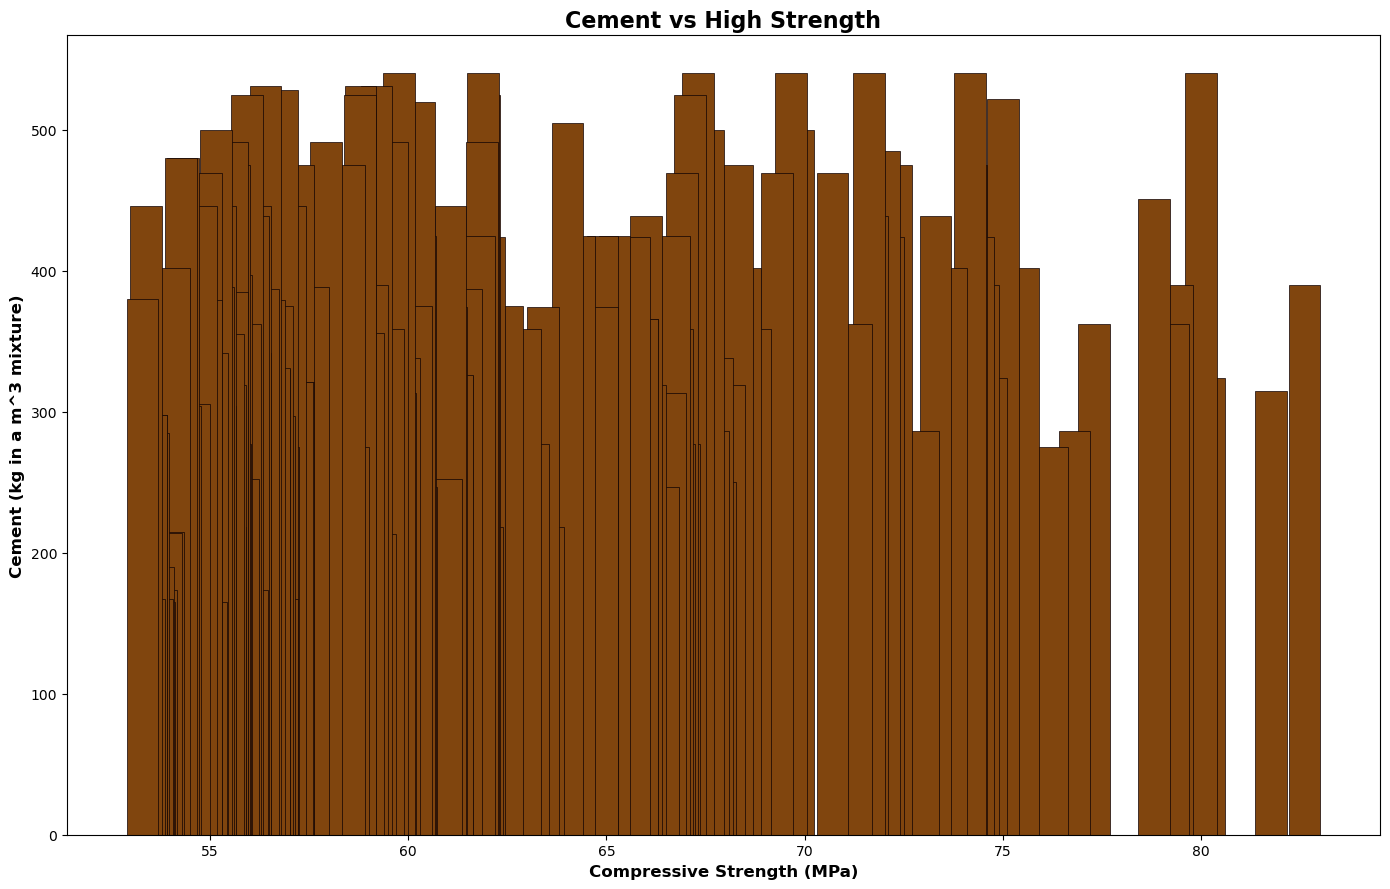

In [24]:
x = df['compressive_strength'].iloc[:150]
y = df['cement'].iloc[:150]
title = "Cement vs High Strength"
x_label = "Compressive Strength (MPa)"
y_label = "Cement (kg in a m^3 mixture)"

plt.figure(figsize=(14, 9))
plt.bar(x, y, color='#80450e', edgecolor='#0d0103', linewidth=0.5)

plt.title(title, fontsize=16, fontweight='bold')
plt.xlabel(x_label, fontsize=12, fontweight='bold')
plt.xticks()
plt.ylabel(y_label, fontsize=12, fontweight='bold')
plt.show()


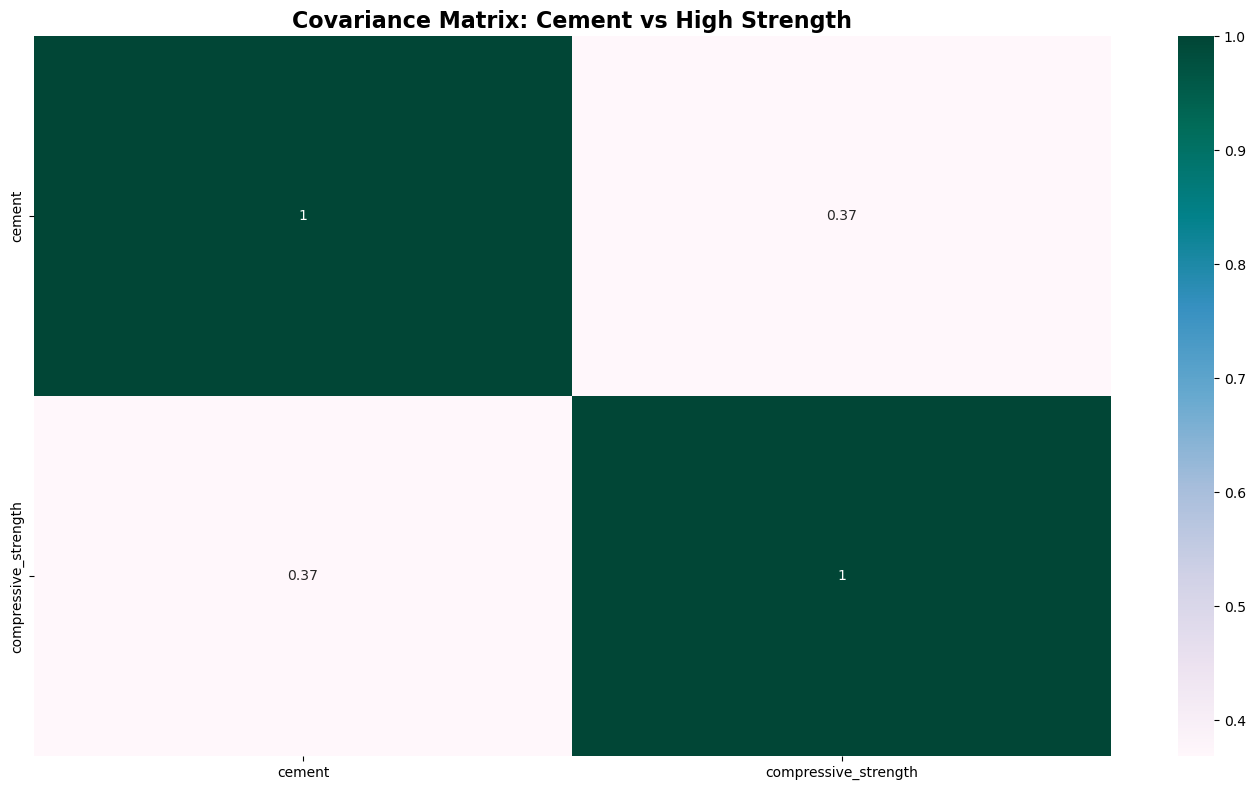

In [25]:
title = "Covariance Matrix: Cement vs High Strength"

corr = df.select_dtypes('number').corr()
sb.heatmap(corr, cmap="PuBuGn", annot=True)
plt.title(title, fontsize=16, fontweight='bold')
plt.show()


<span style="font-family:Lucida Sans Unicode; color:#a10a0a; font-size: 24px; text-shadow: 1px 1px black"> 2.5 Blast furnace effect on Compressive strength (Combined) </span>

In [26]:
df = df_concrete[['blast_furnace_slag', 'compressive_strength']].sort_values(by='compressive_strength',
                                                                                   ascending=False)

df


,blast_furnace_slag,compressive_strength
181,189.0,82.60
381,137.0,81.75
153,282.8,80.20
0,0.0,79.99
159,189.0,79.40
...,...,...
717,212.0,4.83
668,102.0,4.78
652,153.0,4.57
705,183.9,3.32


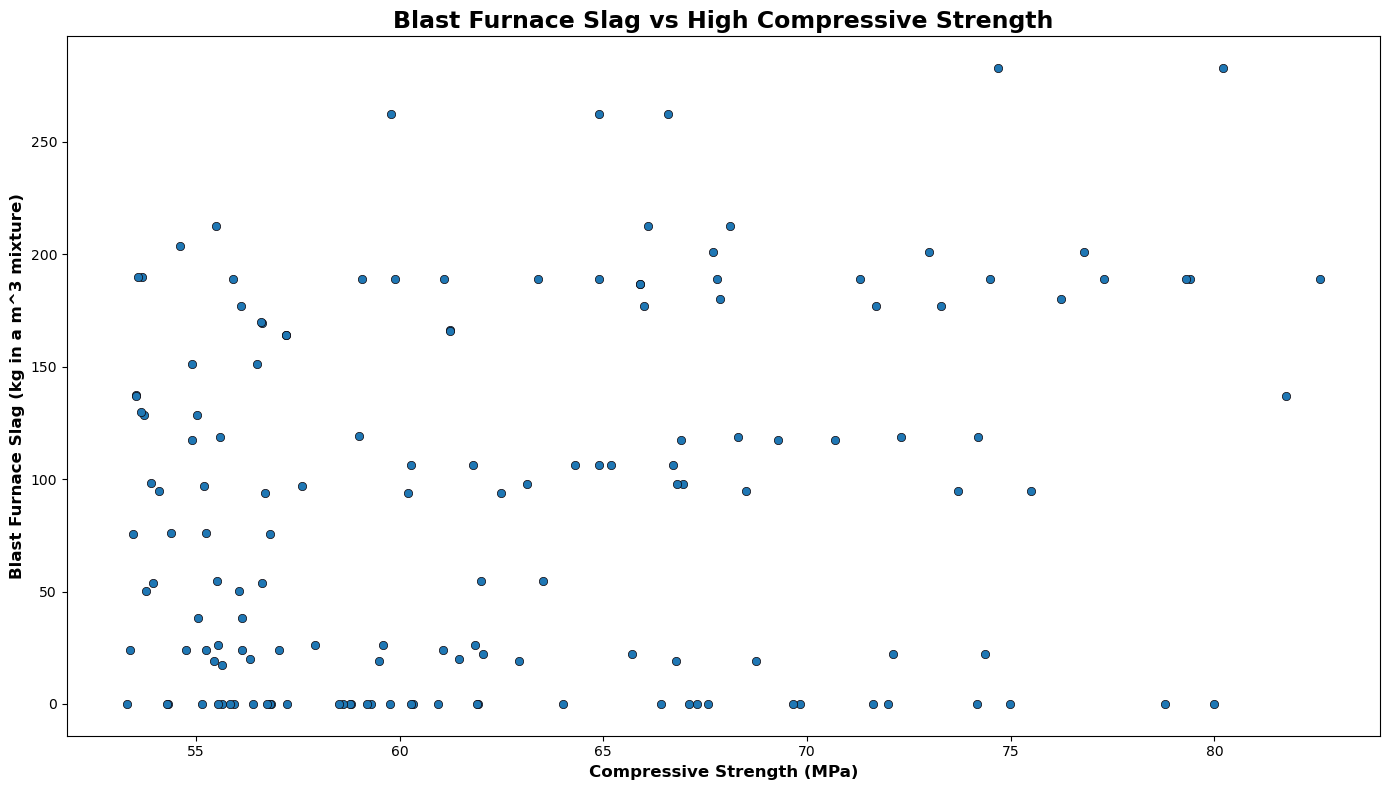

In [27]:
title = "Blast Furnace Slag vs High Compressive Strength"
x_label = "Compressive Strength (MPa)"
y_label = "Blast Furnace Slag (kg in a m^3 mixture)"

x = df['compressive_strength'].iloc[:150]
y = df['blast_furnace_slag'].iloc[:150]

plt.scatter(x, y, edgecolor='#0d0103', linewidth=0.5)

plt.title(title, fontsize=17, fontweight='bold')
plt.xlabel(x_label, fontsize=12, fontweight='bold')
plt.xticks()
plt.ylabel(y_label, fontsize=12, fontweight='bold')
plt.show()

In [28]:
df = high_strength[['blast_furnace_slag', 'compressive_strength']].sort_values(by='compressive_strength',
                                                                                       ascending=False)

df


,blast_furnace_slag,compressive_strength
181,189.0,82.60
381,137.0,81.75
153,282.8,80.20
0,0.0,79.99
159,189.0,79.40
...,...,...
475,24.0,35.36
213,0.0,35.34
202,0.0,35.34
1008,188.0,35.31


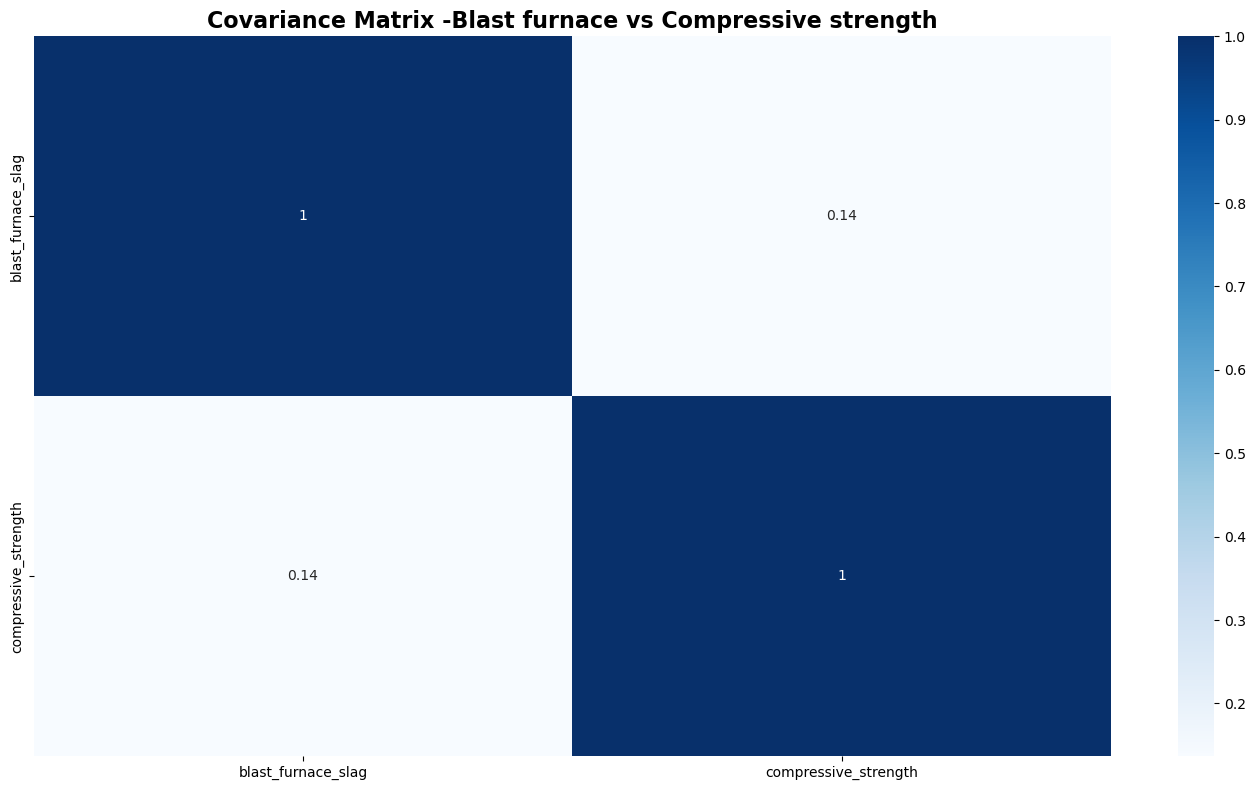

In [29]:
title = "Covariance Matrix -Blast furnace vs Compressive strength"

corr = df.select_dtypes('number').corr()
sb.heatmap(corr, cmap="Blues", annot=True)
plt.title(title, fontsize=16, fontweight='bold')
plt.show()


<span style="font-family:Lucida Sans Unicode; color:#a10a0a; font-size: 24px; text-shadow: 1px 1px black"> 2.6 How much water is required to acquire adequate Strength </span>


In [30]:
df = high_strength[['water', 'compressive_strength']].sort_values(by='compressive_strength',
                                                                  ascending=False)

df


,water,compressive_strength
181,145.9,82.60
381,145.0,81.75
153,183.8,80.20
0,162.0,79.99
159,145.9,79.40
...,...,...
475,162.0,35.36
213,195.5,35.34
202,162.1,35.34
1008,203.2,35.31


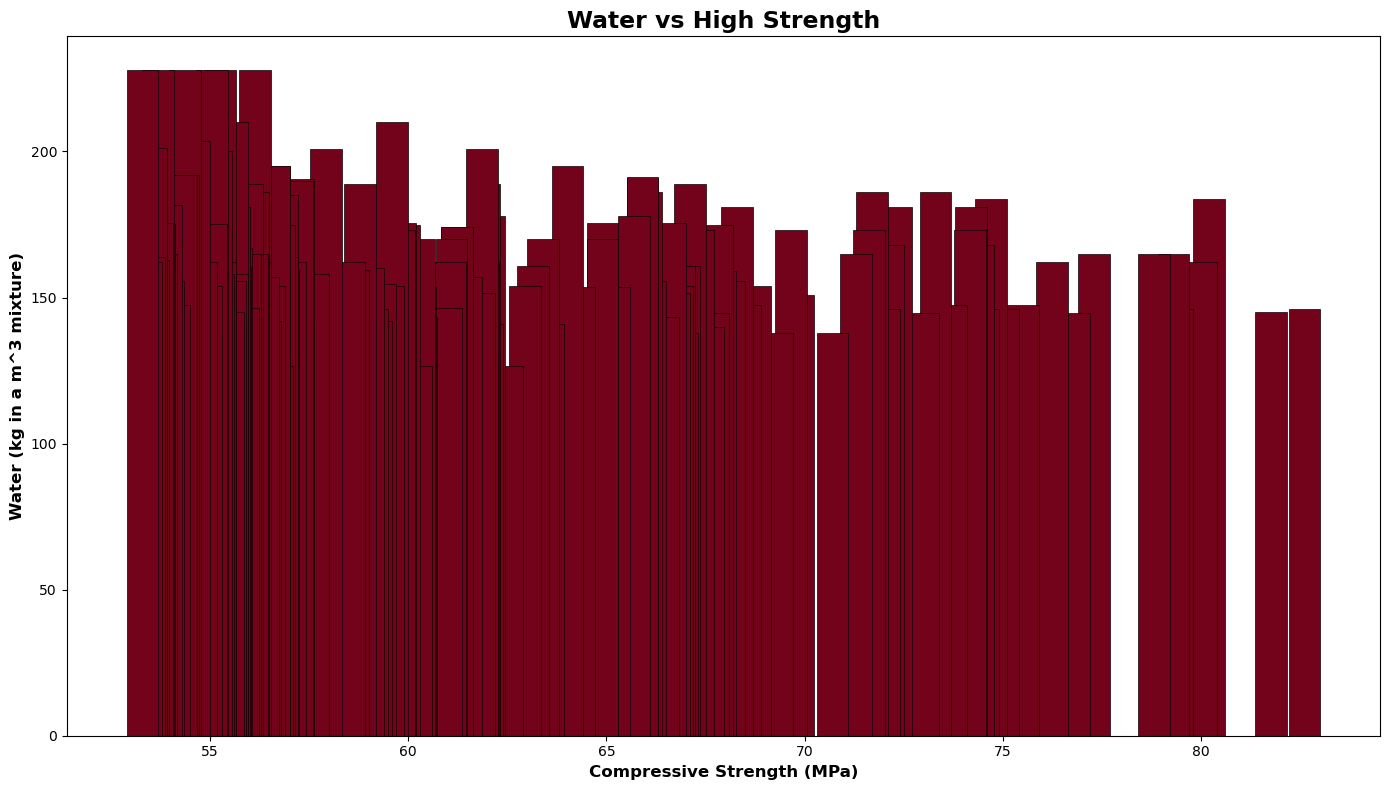

In [31]:
title = "Water vs High Strength"
x_label = "Compressive Strength (MPa)"
y_label = "Water (kg in a m^3 mixture)"

x = df['compressive_strength'].iloc[:150]
y = df['water'].iloc[:150]

plt.bar(x, y, color='#73021b', edgecolor='#0d0103', linewidth=0.5)

plt.title(title, fontsize=17, fontweight='bold')
plt.xlabel(x_label, fontsize=12, fontweight='bold')
plt.xticks()
plt.ylabel(y_label, fontsize=12, fontweight='bold')
plt.show()


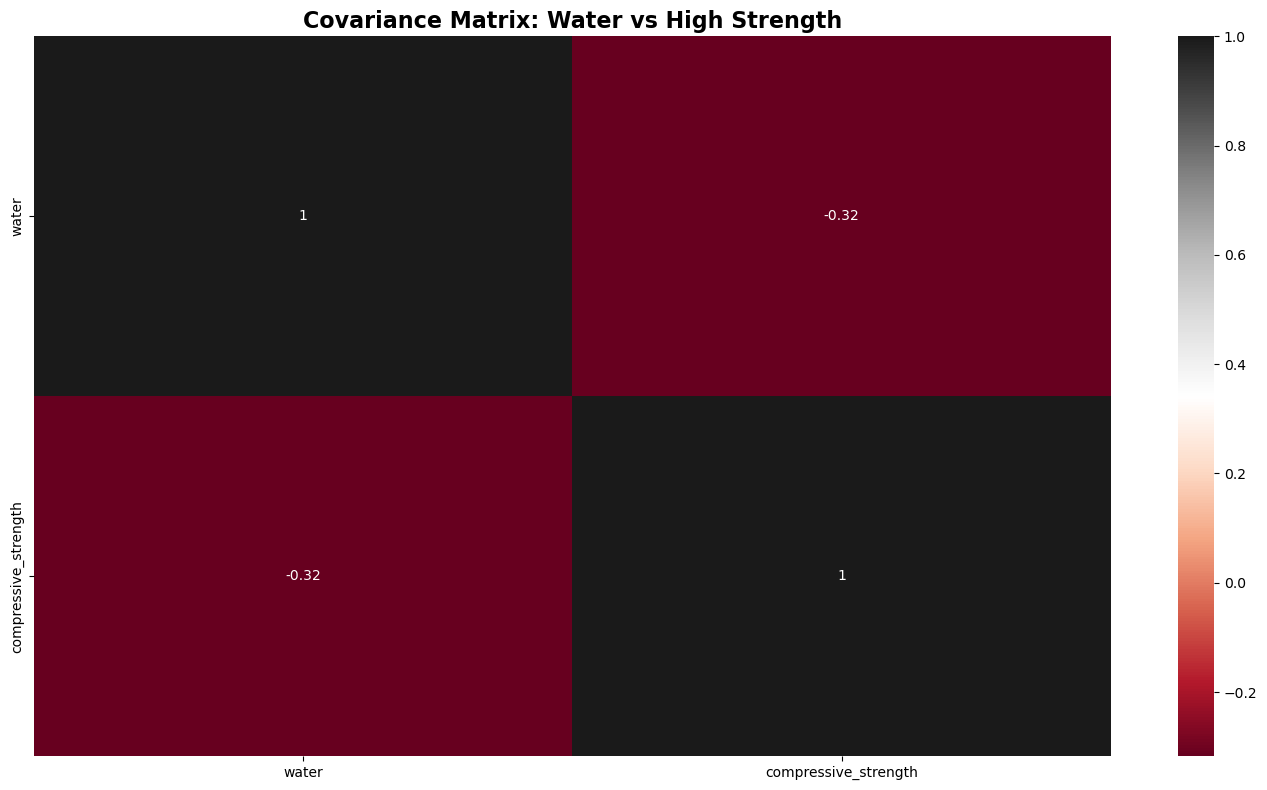

In [32]:
title = "Covariance Matrix: Water vs High Strength"

corr = df.select_dtypes('number').corr()
sb.heatmap(corr, cmap="RdGy", annot=True)
plt.title(title, fontsize=16, fontweight='bold')
plt.show()


<span style="font-family:Lucida Sans Unicode; color:#a10a0a; font-size: 24px; text-shadow: 1px 1px black"> 2.7 How Super Plasticisers affect Compressive strength (combined) </span>

In [33]:
df = df_concrete[['super_plasticisers', 'compressive_strength']].sort_values(by='compressive_strength',
                                                                                   ascending=False)

df


,super_plasticisers,compressive_strength
181,22.0,82.60
381,5.9,81.75
153,10.3,80.20
0,2.5,79.99
159,22.0,79.40
...,...,...
717,0.0,4.83
668,0.0,4.78
652,0.0,4.57
705,0.0,3.32


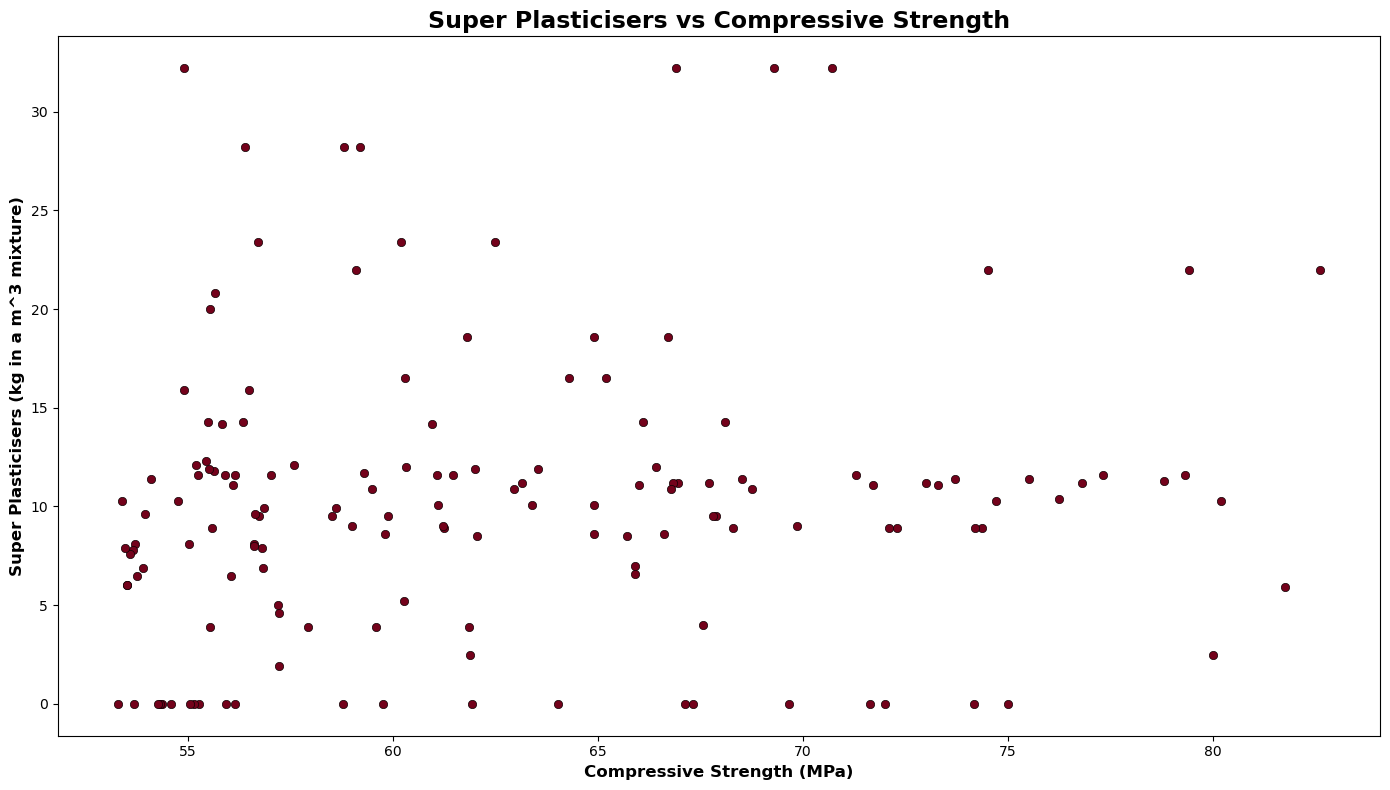

In [34]:
title = "Super Plasticisers vs Compressive Strength"
x_label = "Compressive Strength (MPa)"
y_label = "Super Plasticisers (kg in a m^3 mixture)"

x = df['compressive_strength'].iloc[:150] 
y = df['super_plasticisers'].iloc[:150]

plt.scatter(x, y, color='#73021b', edgecolor='#0d0103', linewidth=0.5)

plt.title(title, fontsize=17, fontweight='bold')
plt.xlabel(x_label, fontsize=12, fontweight='bold')
plt.xticks()
plt.ylabel(y_label, fontsize=12, fontweight='bold')
plt.show()


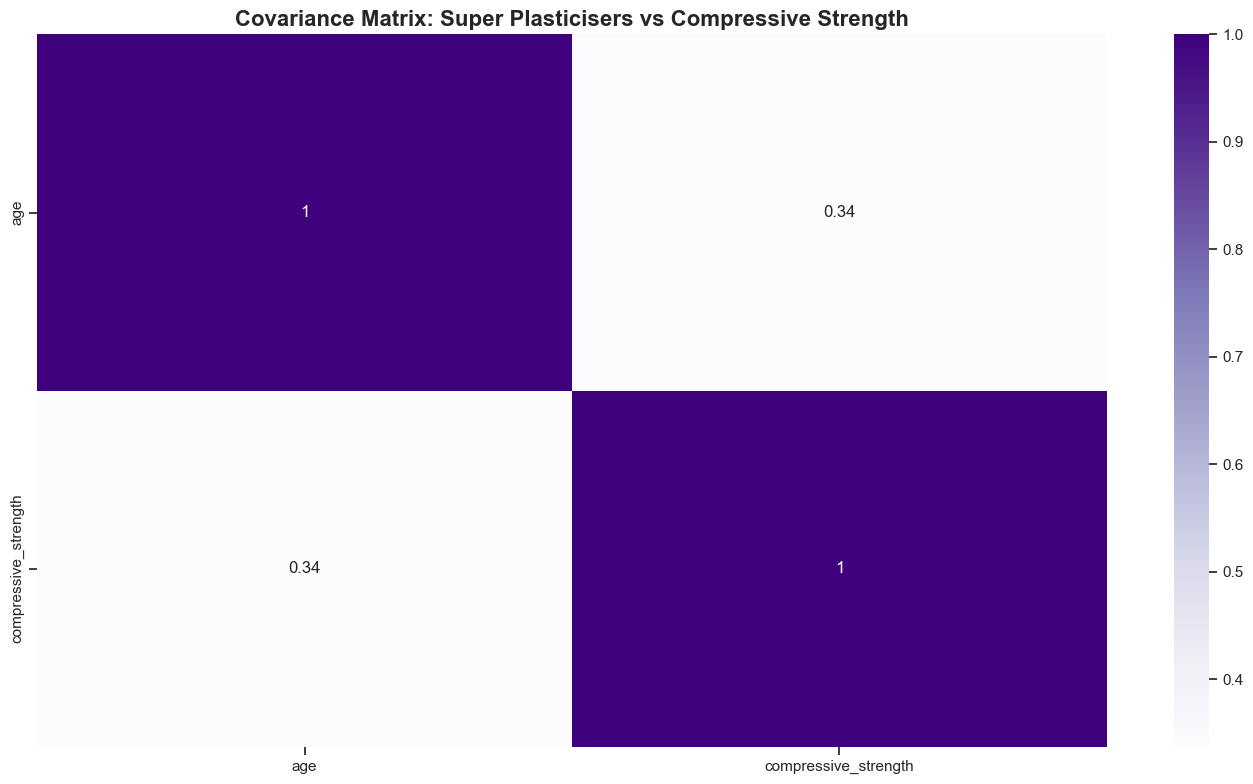

In [49]:
title = "Covariance Matrix: Super Plasticisers vs Compressive Strength"

corr = df.select_dtypes('number').corr()
sb.heatmap(corr, cmap="Purples", annot=True)
plt.title(title, fontsize=16, fontweight='bold')
plt.show()


<span style="font-family:Lucida Sans Unicode; color:#a10a0a; font-size: 24px; text-shadow: 1px 1px black"> 2.8 Cases involving Coarse and Fine Aggregate vs Compressive Strength (combined) </span>

In [36]:
df_concrete['combined_aggregate'] = df_concrete['coarse_aggregate'] + df_concrete['fine_aggregate']

df_concrete.head(25)


,compressive_strength,cement,blast_furnace_slag,water,super_plasticisers,coarse_aggregate,fine_aggregate,age,combined_aggregate
0,79.99,540.0,0.0,162.0,2.5,1040.0,676.0,28,1716.0
1,61.89,540.0,0.0,162.0,2.5,1055.0,676.0,28,1731.0
2,40.27,332.5,142.5,228.0,0.0,932.0,594.0,270,1526.0
3,41.05,332.5,142.5,228.0,0.0,932.0,594.0,365,1526.0
4,44.30,198.6,132.4,192.0,0.0,978.4,825.5,360,1803.9
5,47.03,266.0,114.0,228.0,0.0,932.0,670.0,90,1602.0
6,43.70,380.0,95.0,228.0,0.0,932.0,594.0,365,1526.0
7,36.45,380.0,95.0,228.0,0.0,932.0,594.0,28,1526.0
8,45.85,266.0,114.0,228.0,0.0,932.0,670.0,28,1602.0
9,39.29,475.0,0.0,228.0,0.0,932.0,594.0,28,1526.0


In [37]:
df = df_concrete[['coarse_aggregate', 'compressive_strength']].sort_values(by='compressive_strength', ascending=False)

df


,coarse_aggregate,compressive_strength
181,944.7,82.60
381,1130.0,81.75
153,942.7,80.20
0,1040.0,79.99
159,944.7,79.40
...,...,...
717,971.8,4.83
668,888.0,4.78
652,887.0,4.57
705,958.2,3.32


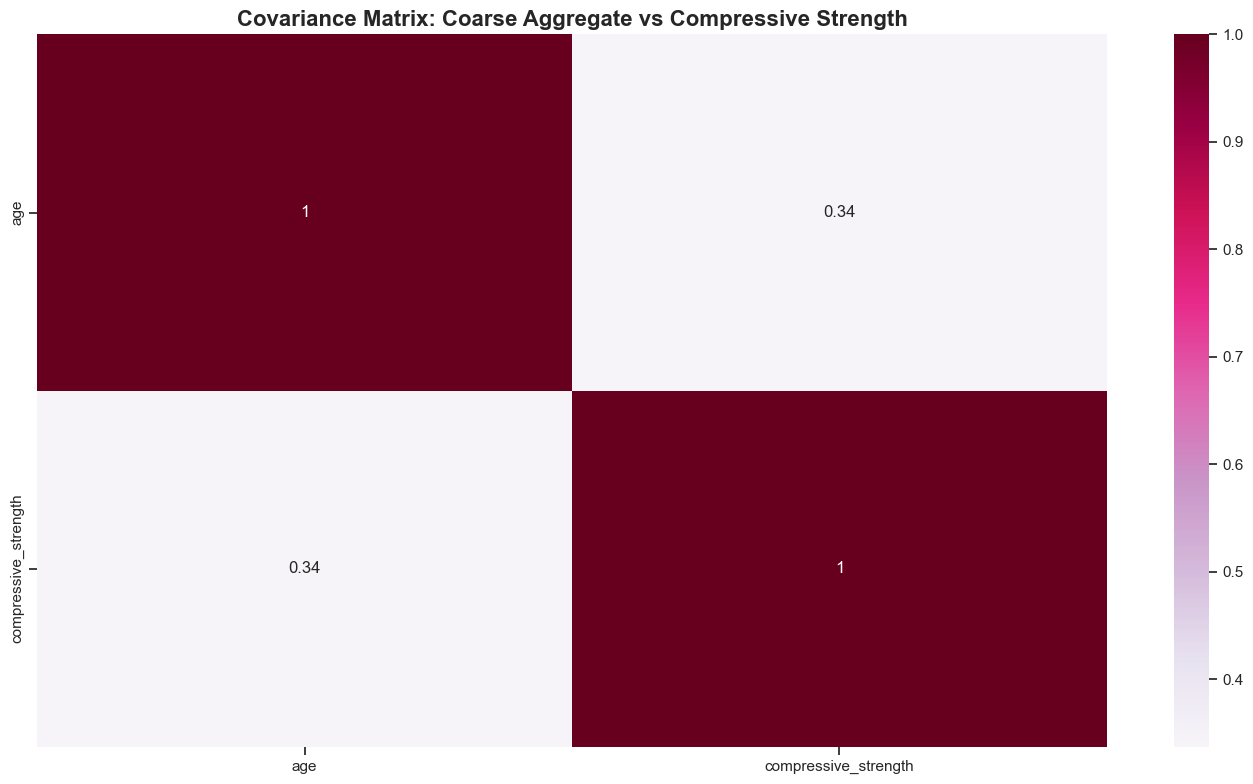

In [51]:
title = "Covariance Matrix: Coarse Aggregate vs Compressive Strength"

corr = df.select_dtypes('number').corr()
sb.heatmap(corr, cmap="PuRd", annot=True)
plt.title(title, fontsize=16, fontweight='bold')
plt.show()


In [39]:
df = df_concrete[['fine_aggregate', 'compressive_strength']].sort_values(by='compressive_strength', ascending=False)

df


,fine_aggregate,compressive_strength
181,755.8,82.60
381,745.0,81.75
153,659.9,80.20
0,676.0,79.99
159,755.8,79.40
...,...,...
717,748.5,4.83
668,943.1,4.78
652,942.0,4.57
705,800.1,3.32


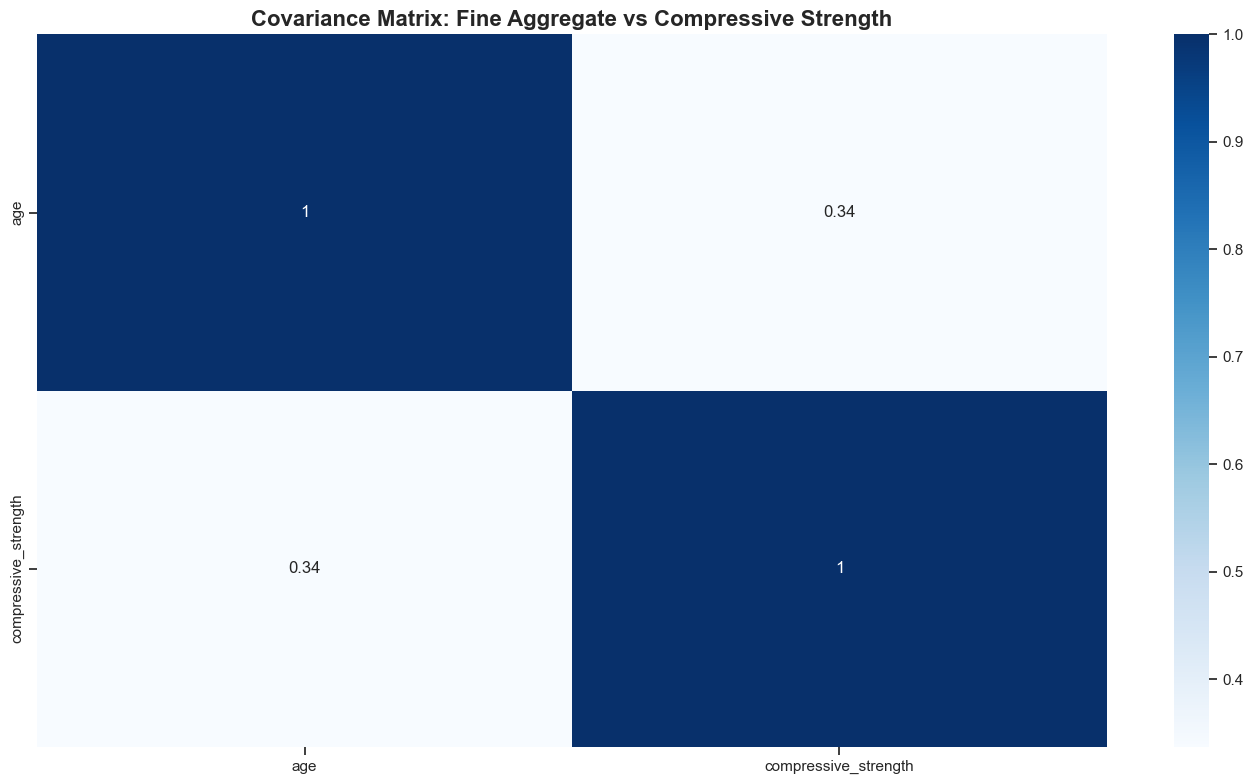

In [52]:
title = "Covariance Matrix: Fine Aggregate vs Compressive Strength"

corr = df.select_dtypes('number').corr()
sb.heatmap(corr, cmap="Blues", annot=True)
plt.title(title, fontsize=16, fontweight='bold')
plt.show()


In [41]:
df = df_concrete[['combined_aggregate', 'compressive_strength']].sort_values(by='compressive_strength', ascending=False)

df


,combined_aggregate,compressive_strength
181,1700.5,82.60
381,1875.0,81.75
153,1602.6,80.20
0,1716.0,79.99
159,1700.5,79.40
...,...,...
717,1720.3,4.83
668,1831.1,4.78
652,1829.0,4.57
705,1758.3,3.32


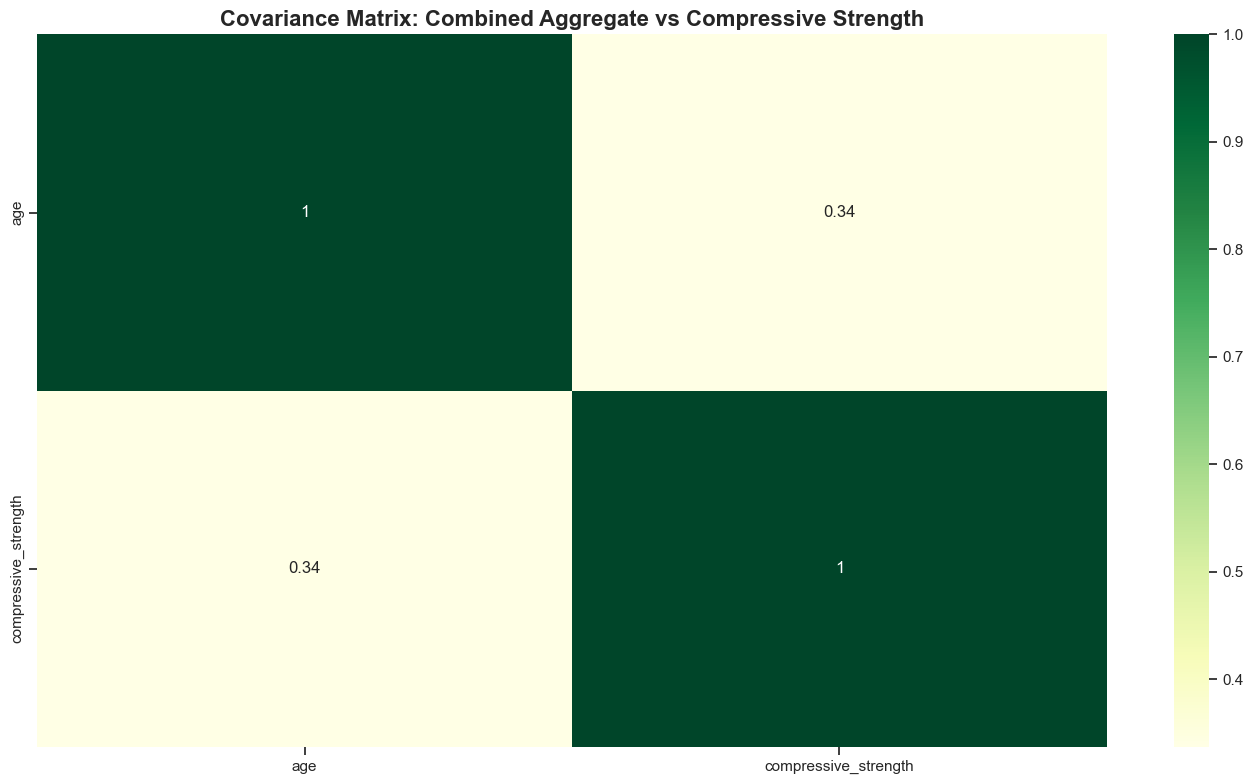

In [53]:
title = "Covariance Matrix: Combined Aggregate vs Compressive Strength"

corr = df.select_dtypes('number').corr()
sb.heatmap(corr, cmap="YlGn", annot=True)
plt.title(title, fontsize=16, fontweight='bold')
plt.show()


<span style="font-family:Lucida Sans Unicode; color:#a10a0a; font-size: 24px; text-shadow: 1px 1px black"> 2.9 Whether age affected the strength in the historical data </span>

In [43]:
df = df_concrete[['age', 'compressive_strength']].sort_values(by='compressive_strength', ascending=False)

df


,age,compressive_strength
181,91,82.60
381,28,81.75
153,56,80.20
0,28,79.99
159,56,79.40
...,...,...
717,3,4.83
668,3,4.78
652,3,4.57
705,3,3.32


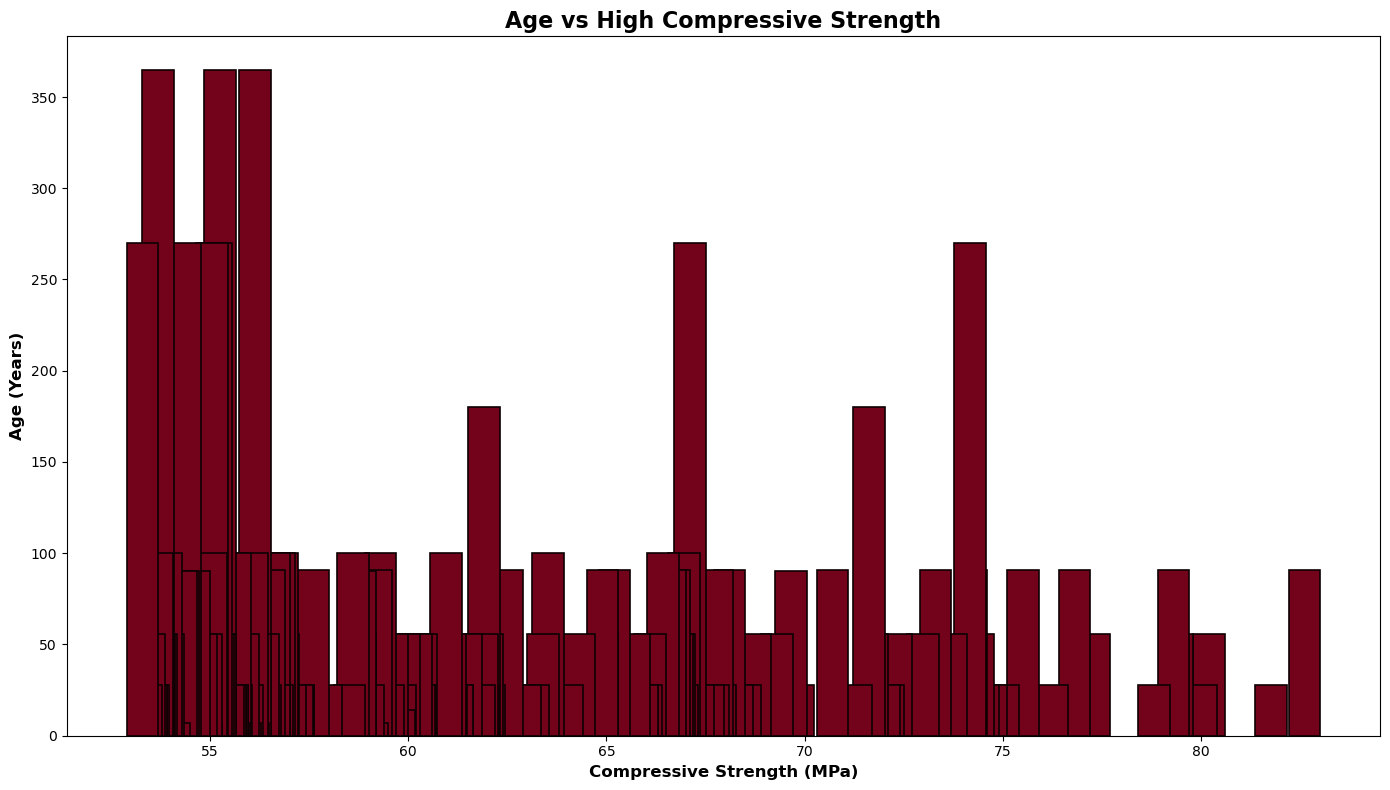

In [44]:
title = "Age vs High Compressive Strength"
x_label = "Compressive Strength (MPa)"
y_label = "Age (Years)"

x = df['compressive_strength'].iloc[:150]
y = df['age'].iloc[:150]

plt.bar(x, y, color='#73021b', edgecolor='#0d0103', linewidth=1.2)

plt.title(title, fontsize=16, fontweight='bold')
plt.xlabel(x_label, fontsize=12, fontweight='bold')
plt.xticks()
plt.ylabel(y_label, fontsize=12, fontweight='bold')
plt.show()


<span style="font-family:Lucida Sans Unicode; color:#a10a0a; font-size: 24px; text-shadow: 1px 1px black"> 2.10 Pair plot to observe the entire dataframe </span>

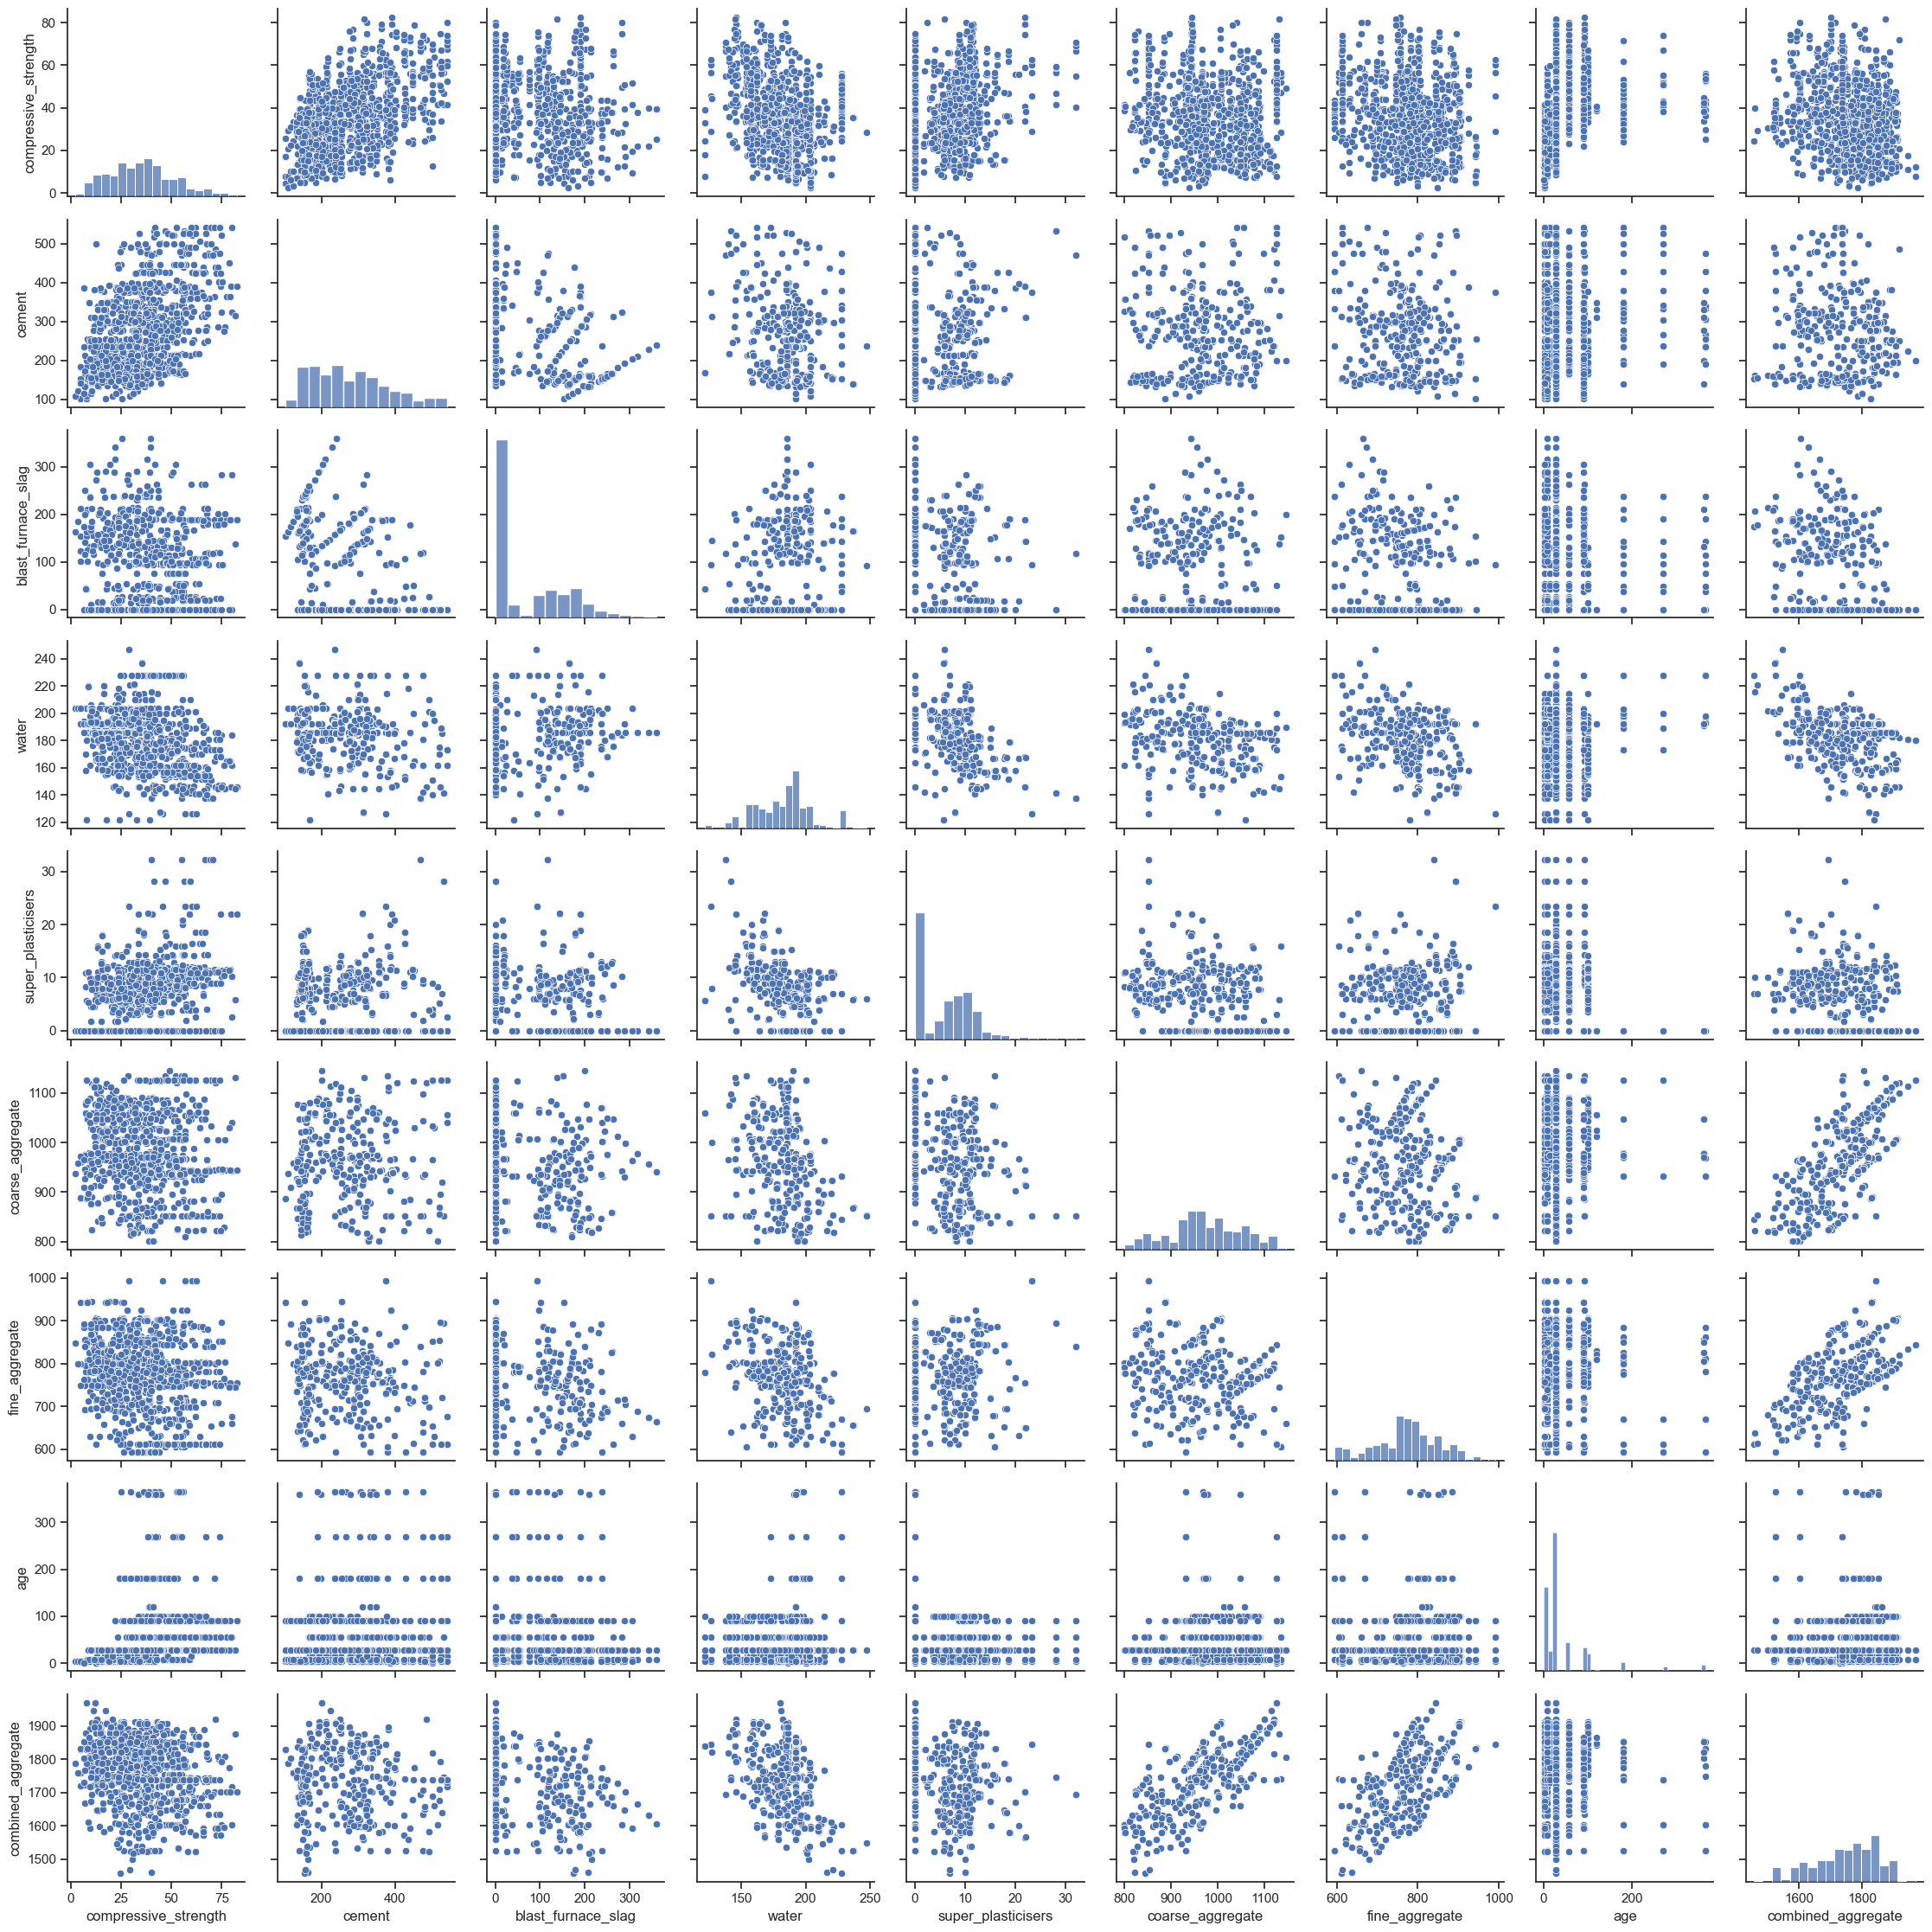

In [45]:
sb.set(style="ticks", color_codes=True)
sb.pairplot(df_concrete)
plt.show()


<span style="font-family:Lucida Sans Unicode; color:#a10a0a; font-size: 24px; text-shadow: 1px 1px black"> 2.11 Save processed data to storage </span>

In [46]:
try:
    df.to_csv('data/processed/compressive_strength.csv', sep=',', index=False)

except Exception as exc:
    print("! Exception encountered", exc)

else:
    print("Dataframe successfully saved")    
    

Dataframe successfully saved
